In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importing the dataset
dataset = pd.read_csv("mpg.csv")
dataset.shape


(398, 9)

In [3]:
dataset.tail(n=15)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
383,38.0,4,91.0,67,1965,15.0,82,3,honda civic
384,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto)
385,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
386,25.0,6,181.0,110,2945,16.4,82,1,buick century limited
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro


In [4]:
X = dataset.iloc[:, [2,5,4]].values #displacement, Acceleration,weight
X.shape
X

array([[ 307. ,   12. , 3504. ],
       [ 350. ,   11.5, 3693. ],
       [ 318. ,   11. , 3436. ],
       ...,
       [ 135. ,   11.6, 2295. ],
       [ 120. ,   18.6, 2625. ],
       [ 119. ,   19.4, 2720. ]])

In [5]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3,init = 'k-means++')

In [6]:
y_kmeans = kmeans.fit_predict(X)

(array([126.,   0.,   0.,   0.,   0., 183.,   0.,   0.,   0.,  89.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

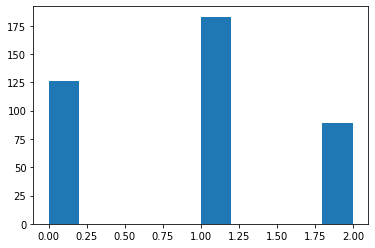

In [7]:
plt.hist(y_kmeans)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


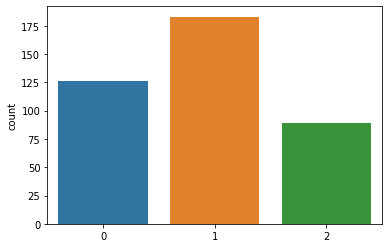

In [8]:
import seaborn as sns
sns.countplot(y_kmeans)

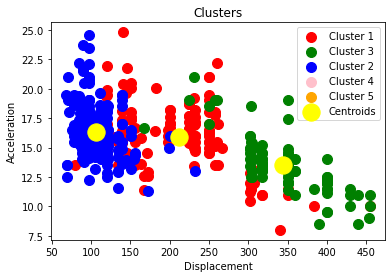

In [9]:
#visualization of two clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Displacement')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [10]:
print("Inertia is", kmeans.inertia_)

Inertia is 34012639.115876056


In [11]:
wcss = []    #finding out the number of clusters by within cluster sum of squares
for i in range (1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)          #fiiting the k means algorithm to our data x
    wcss.append(kmeans.inertia_) 

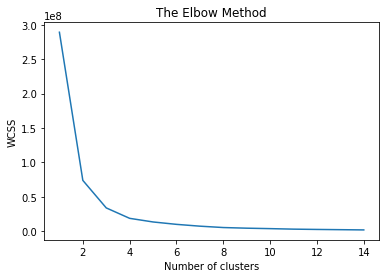

In [12]:
plt.plot(range(1, 15), wcss)  #plotting the Elbow method Graph
plt.title('The Elbow Method') #naming the title
plt.xlabel('Number of clusters')    #labeling x axis   
plt.ylabel('WCSS')          #labelling the y axis          
plt.show()            #Display the chart